# Project 1 - Dogs vs Cats

### 1. Introduction & Objectives

**Identifying Dogs and Cats with AI**

The "Dogs vs Cats" project aims to develop a machine learning model capable of effectively classifying images of dogs and cats. The project is structured into phases, starting with a basic implementation and advancing to more sophisticated enhancements such as transfer learning and data augmentation. This project provides an opportunity to deepen the understanding of core machine learning concepts, including data preprocessing, deep learning model design, and performance improvement techniques.

The first phase focuses on creating a baseline solution by implementing a simple convolutional neural network (CNN) for image classification without leveraging advanced techniques like data augmentation. After training the model, its performance will be analyzed, identifying potential challenges such as misclassified images and understanding the reasons behind these errors.

The second phase emphasizes improving the model. This involves utilizing transfer learning through a pre-trained VGG16 model and experimenting with layer freezing to enhance performance. Additionally, data augmentation techniques will be employed to diversify the training dataset and analyze their impact on the model's generalization capabilities.

**Objectives of the Project:**
1. **Image Classification:** Develop and optimize a machine learning model to distinguish between images of dogs and cats.
2. **Baseline Model Construction:** Implement a simple CNN model and analyze its initial performance.
3. **Data Management:** Prepare the image dataset by splitting it into training, validation, and test sets, and document the directory structure for efficient data handling.
4. **Transfer Learning Implementation:** Enhance the model's performance by utilizing pre-trained models and experimenting with techniques such as layer freezing.
5. **Data Augmentation:** Increase dataset diversity using at least three augmentation techniques and evaluate their effects on performance.
6. **Result Documentation and Analysis:** Compare different approaches, identify challenges, and propose solutions following the CRISP-DM methodology.
7. **Future Development Ideas:** Assess the project's outcomes and identify new strategies to improve the model's performance further.

Through this project, we will gain hands-on experience with deep learning implementation and learn to evaluate the impact of various techniques on image processing and classification tasks.

---

### 2. Data Understanding

**Data Understanding**

The dataset used in this project originates from the well-known "Dogs vs. Cats" competition on Kaggle. This dataset contains labeled images of dogs and cats, offering an excellent foundation for binary classification tasks in computer vision. The images are diverse, varying in resolution, perspective, and lighting conditions, which makes the dataset a practical choice for developing and testing deep learning models.

#### Dataset Overview:
1. **Categories**:
   The dataset includes two main categories: **dogs** and **cats**. Each image is clearly labeled with the corresponding class.

2. **Format**:
   Images are provided in JPEG format, making them compatible with most image processing libraries and frameworks.

3. **Size**:
   The original dataset contains 25,000 images (12,500 for each category). However, in this project, a smaller subset will be used to streamline experimentation and training.

4. **Challenges in the Data**:
   - **Visual Variability**: Images contain variations in scale, orientation, backgrounds, and lighting conditions, introducing real-world complexities to the classification task.
   - **Class Imbalance**: While the dataset is generally balanced, care must be taken to ensure subsets maintain a similar distribution for meaningful training, validation, and testing.

5. **Data Usage in the Project**:
   - **Training Set**: Used to train the model to distinguish between dog and cat images.
   - **Validation Set**: Helps evaluate the model’s performance during training and fine-tune hyperparameters.
   - **Test Set**: Provides an independent evaluation to assess the model’s final performance.

6. **Directory Structure**:
   To facilitate the project, the dataset will be organized into a structured directory system.
   ```
   data/
     test/
       dog/
       cat/
     train/
       dog/
       cat/
     validation/
       dog/
       cat/
   ```

#### Visual Exploration:
- Before delving into model training, example images from both categories will be displayed to understand the dataset’s diversity and confirm its proper loading. This step ensures that data preprocessing is correctly implemented and provides insight into any anomalies or inconsistencies in the data.

#### Key Insights for Modeling:
- The dataset’s high variability requires robust preprocessing and augmentation techniques to help the model generalize effectively.
- A careful split into training, validation, and test sets will ensure that the evaluation metrics reflect the model's true performance.
- Potential issues such as mislabeled images or noise in the dataset will need to be monitored and addressed as part of the data analysis process.

By thoroughly understanding the data, we can tailor preprocessing steps and model design to maximize classification performance while addressing challenges posed by the dataset's complexity.

#### 2.1 Environment Setup

To streamline this notebook, we will supress TensorFlow warnings, and set the Keras backend to TensorFlow. We will also provide a way to disable the GPU. Just set the flag `use_gpu` to `False` to disable the GPU.

In [1]:
# Supress TensorFlow warnings and set the Keras backend to TensorFlow
import os
import sys

os.environ['KERAS_BACKEND'] = 'tensorflow'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Redirect stderr to null
sys.stderr = open(os.devnull, 'w')

# Set the flag to disable the GPU
use_gpu = True

In [2]:
if not use_gpu:
    # Disable the GPU
    os.environ['CUDA_VISIBLE_DEVICES'] = ''

    print("GPU is disabled.")
else:
    # Set the GPU device
    os.environ['CUDA_VISIBLE_DEVICES'] = '0'

    # Optimize GPU memory allocation
    os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"

    # Enable XLA JIT compilation
    os.environ["TF_XLA_FLAGS"] = "--tf_xla_enable_xla_devices"

    # Disable unnecessary logging
    os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

    # Maximize GPU usage
    os.environ["TF_ENABLE_GPU_GARBAGE_COLLECTION"] = "false"

    # Advanced GPU optimizations
    os.environ["TF_GPU_THREAD_MODE"] = "gpu_private"
    os.environ["TF_FORCE_UNIFIED_MEMORY"] = "1"
    os.environ["TF_ENABLE_AUTO_MIXED_PRECISION"] = "1"

    print("GPU is enabled.")

GPU is enabled.


#### 2.2 Importing Libraries

Next we will import the necessary libraries for this project.

1. **`numpy as np`**
   Used for numerical computations and handling arrays; a fundamental library in scientific computing.

2. **`from pathlib import Path`**
   Provides a convenient way to handle filesystem paths and directories in a platform-independent manner.

3. **`import matplotlib.pyplot as plt`**
   A plotting library for visualizing data, commonly used for displaying images and graphs.

4. **`from shutil import rmtree, copyfile`**
   - `rmtree`: Used to delete an entire directory tree.
   - `copyfile`: Copies a file from one location to another.

5. **`from keras.api.models import load_model`**
   Loads pre-trained models saved in the Keras format for transfer learning or continued training.

6. **`from keras.src import Sequential, Input, Model`**
   - `Sequential`: Simplifies the creation of linear (layer-by-layer) models.
   - `Input`: Specifies input dimensions for a model.
   - `Model`: A class for defining models with more complex architectures or functional API.

7. **`from keras.src.callbacks import ModelCheckpoint`**
   Saves the model during training whenever validation metrics improve, enabling checkpoints for recovery or analysis.

8. **`from keras.src.utils import image_dataset_from_directory`**
   Generates image datasets from a directory structure, handling preprocessing and splitting data for training/validation.

9. **`from keras.src.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling`**
   - `Conv2D`: A convolutional layer for extracting spatial features from images.
   - `MaxPooling2D`: A pooling layer to reduce spatial dimensions while retaining important features.
   - `Flatten`: Converts multidimensional data into a 1D vector for fully connected layers.
   - `Dense`: Fully connected layers for classification or regression tasks.
   - `Rescaling`: Scales input data to a specified range (e.g., normalization).

TODO: Added new imports, mention them!

In [3]:
# Importing Libraries
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from shutil import rmtree, copyfile
from keras.src.optimizers import Adam  # New import
from keras.api.models import load_model
from keras.src import Sequential, Input, Model
from keras.src.applications.vgg16 import VGG16  # New import
from keras.src.callbacks import ModelCheckpoint
from keras.src.utils import image_dataset_from_directory
from keras.api.layers import RandomFlip, RandomZoom, RandomRotation  # New imports
from keras.src.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling, Dropout  # New import: Dropout

#### 2.3 Creating the Folder Structure

Before we can load the data, we will need to split the data into training, validation and test folders for easier processing. We will use the following directory structure:

    Training set: Inputs/dogs_vs_cats/train
    1,000 images of cats, and 1,000 images of dogs

    Validation set: Inputs/dogs_vs_cats/valid
    500 images of cats, and 500 images of dogs

    Test set: Inputs/dogs_vs_cats/test
    1,000 images of cats, and 1,000 images of dogs

We will use the following Python code to create the subsets from the original dataset.

In [4]:
original_dir = Path('../Inputs/dogs_vs_cats_orig/train')
new_base_dir = Path('../Inputs/dogs_vs_cats')

# Remove the new_base_dir if it already exists
if new_base_dir.exists():
    rmtree(new_base_dir)


# Define a function to create the new directory structure
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)  # Create directories
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            copyfile(src=original_dir / fname, dst=dir / fname)


# Create the subsets
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

#### 2.4 Loading the Data

Now that we have created the folder structure, we can load the data using the `image_dataset_from_directory` function from Keras. We will create the training, validation and test datasets using the following code.

In [5]:
# Load the data
train_dataset = image_dataset_from_directory(new_base_dir / 'train', image_size=(180, 180), batch_size=32)
validation_dataset = image_dataset_from_directory(new_base_dir / 'validation', image_size=(180, 180), batch_size=32)
test_dataset = image_dataset_from_directory(new_base_dir / 'test', image_size=(180, 180), batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


We have now loaded the data into the `train_dataset`, `validation_dataset` and `test_dataset` variables. Let's visualise some of the images from the training dataset to better understand the data.

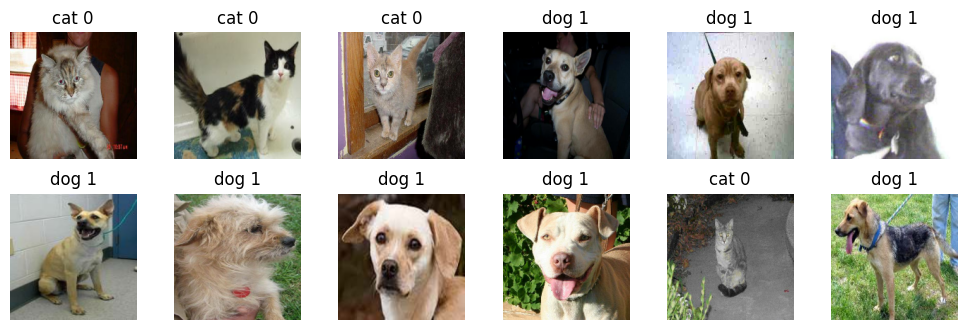

In [6]:
# Visualize the data
plt.figure(figsize=(10, 5))
for images, labels in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"cat {labels[i]}" if labels[i].numpy() == 0 else f"dog {labels[i]}")
        plt.axis("off")

plt.tight_layout()
plt.show()

Here we can see some of the images from the training dataset. The labels above the images indicate whether the image is a cat or a dog. For clarity purposes, we have included the "dog" and "cat" labels above the images, but in the dataset, the labels are represented as 0 for cats and 1 for dogs.

### 3. First Model: Convolutional Neural Network (CNN)

For our first model, we will build a simple Convolutional Neural Network, without any data augmentation. We will use the following architecture for the model:

        Input layer: 180x180 RGB image
        Rescaling layer: Rescale the pixel values to [0, 1]
        Convolutional 2D layer: 32 filters, 3x3 kernel, ReLU activation
        Max pooling 2D layer: 2x2 pool size
        Convolutional 2D layer: 64 filters, 3x3 kernel, ReLU activation
        Max pooling 2D layer: 2x2 pool size
        Convolutional 2D layer: 128 filters, 3x3 kernel, ReLU activation
        Max pooling 2D layer: 2x2 pool size
        Convolutional 2D layer: 256 filters, 3x3 kernel, ReLU activation
        Max pooling 2D layer: 2x2 pool size
        Convolutional 2D layer: 256 filters, 3x3 kernel, ReLU activation
        Flatten layer
        Output layer: 1 unit, Sigmoid activation

This model should be able to achieve a decent accuracy on the Dogs vs Cats dataset. Let's build the model using the following code.

In [7]:
# Build the model
inputs = Input(shape=(180, 180, 3))

x = Rescaling(1. / 255)(inputs)

x = Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = Flatten()(x)

outputs = Dense(1, activation="sigmoid", name="Output")(x)

model = Model(inputs=inputs, outputs=outputs, name="Dogs_vs_Cats_CNN")

model.summary()

Model: "Dogs_vs_Cats_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

The CNN model has been successfully built. We can see the summary of the model above, which shows the architecture of the model, including the number of parameters in each layer. The model has a total of `991,041` trainable parameters. We can now move onto compiling and training the model.

### 4. Compiling and Training the Model

We will compile the CNN model using the `Adam` optimizer and the `binary crossentropy` loss function, which is appropriate for binary classification tasks. The model's performance will be measured using `accuracy` as the primary metric. During training, we will save the model's best version based on the validation loss using a `ModelCheckpoint` callback. The model will be trained for `30 epochs` using the fit method, with training performed on the training dataset and validation on the validation dataset.

In [8]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define the callbacks
callbacks = [
    ModelCheckpoint(
        filepath="../Models/Dogs_vs_Cats_CNN.keras",
        save_best_only=True,
        monitor="val_loss",
        verbose=1
    )
]

# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=30,
    callbacks=callbacks
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5316 - loss: 0.6908
Epoch 1: val_loss improved from inf to 0.68589, saving model to ../Models/Dogs_vs_Cats_CNN.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 114ms/step - accuracy: 0.5314 - loss: 0.6908 - val_accuracy: 0.5680 - val_loss: 0.6859
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5367 - loss: 0.6895
Epoch 2: val_loss improved from 0.68589 to 0.67553, saving model to ../Models/Dogs_vs_Cats_CNN.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5369 - loss: 0.6894 - val_accuracy: 0.5770 - val_loss: 0.6755
Epoch 3/30
61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5815 - loss: 0.6728
Epoch 3: val_loss improved from 0.67553 to 0.60845, saving model to ../Models/Dogs_vs_Cats_CNN.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5833 - loss: 0.6721 - val_accuracy: 0.6710 - val_loss: 0.6085
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6450 - loss: 0.6384
Epoch 4: va

The CNN model was successfully compiled and trained, with the training progress recorded in the `history` variable. This variable contains metrics for both training and validation across all epochs.

Analysis of the training history reveals that the validation loss steadily decreased until the 8th epoch, reaching its lowest value of 0.57572. Afterward, the validation loss began to increase, indicating that the model started overfitting the training data beyond this point. The validation accuracy plateaued at approximately 75% after the 22nd epoch, showing limited improvement in generalization despite further training.

The `ModelCheckpoint` callback ensured that the best version of the model—determined by the lowest validation loss at epoch 8—was saved. This guarantees that the most optimal version of the model is available for evaluation. We will now test the model on the test dataset to assess its performance on unseen data.

### 5. Model Evaluation

Before we start evaluating the model on the test dataset, let's visualize the training history to better understand the model's performance during training.

#### 5.1 Visualizing the Training History

We will plot the training and validation accuracy and loss over the epochs to visualize the model's performance during training. This will help us identify trends such as overfitting, underfitting, or convergence issues. We will also highlight the 8th epoch to indicate where the model started to overfit the training data.

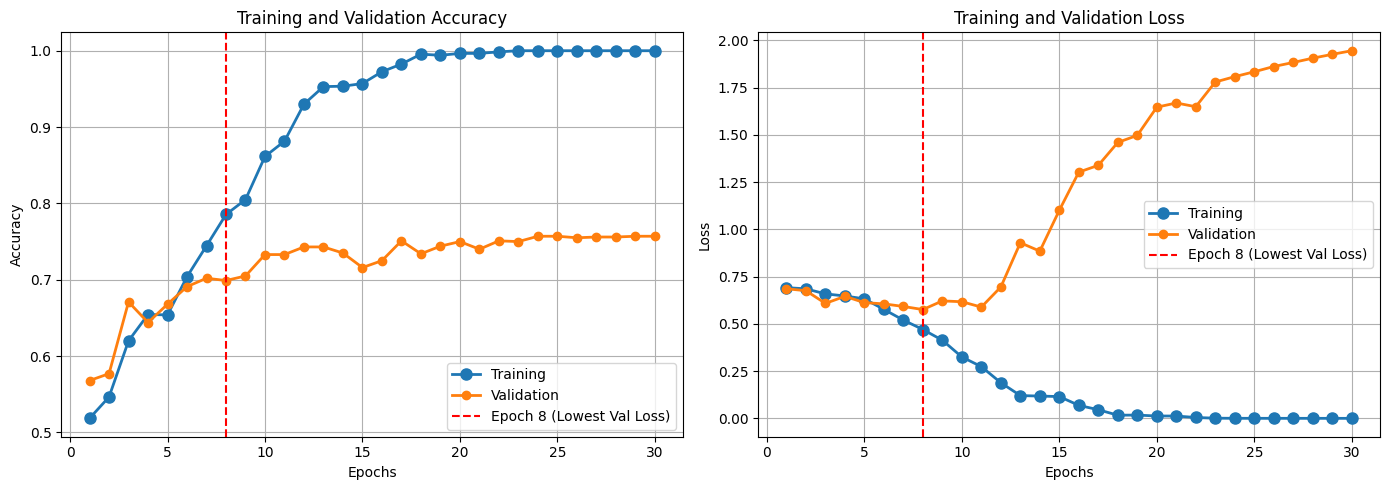

In [9]:
# Extract data from history
epochs = range(1, len(history.history["accuracy"]) + 1)

# Create subplots for accuracy and loss
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Highlight epoch 8 (lowest validation loss)
highlight_epoch = 8
highlight_color = "red"

# Plot accuracy and loss
for ax, metric, title, ylabel in zip(
        axes,
        [("accuracy", "val_accuracy"), ("loss", "val_loss")],
        ["Training and Validation Accuracy", "Training and Validation Loss"],
        ["Accuracy", "Loss"]
):
    ax.plot(epochs, history.history[metric[0]], "o-", label="Training", markersize=8, linewidth=2)
    ax.plot(epochs, history.history[metric[1]], "o-", label="Validation", linewidth=2)

    # Highlight the 8th epoch
    ax.axvline(highlight_epoch, linestyle="--", color=highlight_color,
               label=f"Epoch {highlight_epoch} (Lowest Val Loss)")
    ax.set_title(title)
    ax.set_xlabel("Epochs")
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

From the plots, we observe that the training accuracy steadily increases over the epochs, reaching nearly 100% by the end of training. The validation accuracy improves until around **epoch 8**, where it peaks at approximately 75%, and then fluctuates slightly without significant improvement.

The training loss consistently decreases as expected, but the validation loss reaches its minimum at **epoch 8** and begins to increase significantly afterward. This divergence between training and validation metrics indicates that the model starts to overfit the training data after epoch 8. While it continues to perform well on the training set, its ability to generalize to unseen data deteriorates beyond this point.

The increasing validation loss despite stagnant validation accuracy highlights overfitting. Techniques such as early stopping, dropout, or data augmentation could help prevent the model from overfitting and improve its generalization to validation and test data.

Now, let's evaluate the model on the test dataset to determine its performance on unseen data.

#### 5.1 Evaluating the Model

For evaluating the model, we will load the best version of the model we saved during training using the `ModelCheckpoint` callback. We will then evaluate the model on the test dataset to determine its performance on unseen data.

In [10]:
# Load the best model
best_model = load_model("../Models/Dogs_vs_Cats_CNN.keras")

# Evaluate the model on the test dataset
test_loss, test_accuracy = best_model.evaluate(test_dataset, verbose=0)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%")

Test Loss: 0.5902, Test Accuracy: 69.55%


The model was evaluated on the test dataset and achieved the following results:
- **Test Loss:** 0.5902
- **Test Accuracy:** 69.55%

The test loss reflects the average error in the model's predictions as measured by the binary cross-entropy loss function. The accuracy indicates that the model correctly classified 69.55% of the test samples.

These results suggest that while the model learned to some extent, its generalization to unseen data is limited, likely due to overfitting during training. To improve performance, further steps such as increasing the training data size, applying regularization techniques like dropout, or fine-tuning the model's architecture may be beneficial.

Let's take a look at some of the images the model incorrectly identified to gain insights into its performance.

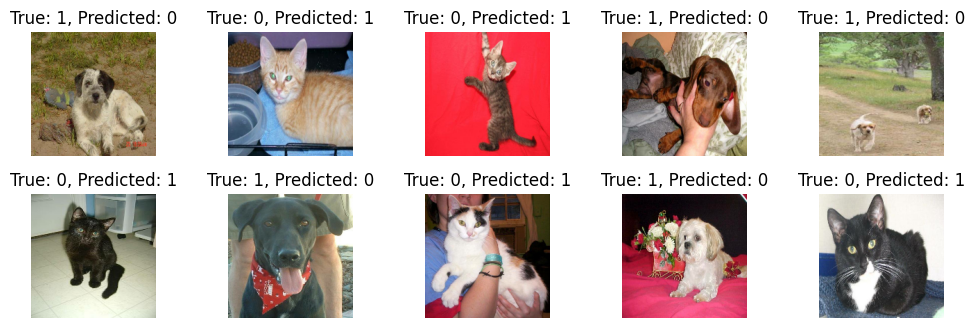

In [11]:
# Get the predictions from the model
predictions = model.predict(test_dataset, verbose=0)
predicted_labels = (predictions > 0.5).astype("int32")  # Convert probabilities to binary labels (0 or 1)

# Extract true labels and images from the dataset
true_labels = []
images = []

for image_batch, label_batch in test_dataset:
    images.extend(image_batch.numpy())  # Collect images
    true_labels.extend(label_batch.numpy())  # Collect true labels

true_labels = np.array(true_labels)

# Identify misclassified images
wrong_indices = np.where(predicted_labels.flatten() != true_labels)[0]

# Display some of the wrongly identified images
num_images = min(10, len(wrong_indices))  # Limit to 9 images for display
plt.figure(figsize=(10, 5))

for i, idx in enumerate(wrong_indices[:num_images]):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[idx].astype("uint8"))  # Convert image data to displayable format
    plt.title(f"True: {true_labels[idx]}, Predicted: {predicted_labels[idx][0]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

### Possible Reasons for Incorrect Predictions

1. **Ambiguous Features:**
   - Some images may lack clear visual cues to distinguish cats from dogs. For instance:
     - The dog in the first row, first column (True: 1, Predicted: 0) might have been misclassified due to its relaxed posture and fur pattern, which are not strongly indicative of a dog.
     - The cat in the second row, fifth column (True: 0, Predicted: 1) might have been misclassified due to its bold fur pattern resembling some small dog breeds.

2. **Lighting and Background:**
   - Poor lighting or cluttered backgrounds may confuse the model. For example:
     - The dog in the first row, fifth column (True: 1, Predicted: 0) appears outdoors with a background that may divert the model's focus away from the dog.

3. **Class Similarities:**
   - Cats and dogs share some visual similarities, such as fur patterns or body shapes, which might lead to confusion. For instance:
     - The cat in the second row, fourth column (True: 0, Predicted: 1) might have been misclassified because its sitting posture and prominent whiskers could resemble a small dog.

4. **Perspective and Cropping:**
   - Unusual camera angles or poorly cropped images can obscure distinguishing features. For example:
     - The dog in the first row, fourth column (True: 1, Predicted: 0) may have been cropped in a way that does not emphasize its distinctive dog-like characteristics.

5. **Overfitting to Training Data:**
   - The model may have overfitted certain patterns in the training data, leading it to focus on irrelevant details. For example:
     - The cat in the first row, second column (True: 0, Predicted: 1) might have been misclassified due to the presence of a metal bowl, which the model could incorrectly associate with dogs.

6. **Model Bias:**
   - The model may be biased toward features seen more frequently during training. For instance:
     - The dog in the second row, third column (True: 1, Predicted: 0) may have been misclassified because of the decorative background, which could resemble environments more common in cat images.

7. **Small Details Confusing the Model:**
   - Small details like collars, fur patterns, or background objects may confuse the model. For example:
     - The dog in the second row, first column (True: 1, Predicted: 0) might have been misclassified due to its facial expression and the angle, which obscure its "dog-like" features.

By analyzing these misclassified images, we can identify areas for improvement, such as increasing dataset diversity, refining data augmentation techniques, or leveraging a more advanced architecture like Transfer Learning to enhance performance and generalization.

### 6. Second Model: Transfer Learning with a Pre-trained VGG16 Model

In the second approach, we will implement **Transfer Learning** by utilizing a pre-trained VGG16 model. Transfer Learning allows us to take advantage of the knowledge the model has gained from training on a large dataset like ImageNet and apply it to our specific task of classifying dogs and cats. This method is particularly effective when working with limited training data, as it improves performance by leveraging pre-learned features.

To retain the pre-trained model's feature extraction capabilities, we will freeze its convolutional base and train only the classifier on top of it. This ensures that the model's existing knowledge is preserved while adapting the classification layer to our dataset.

Additionally, we will incorporate **data augmentation** techniques, such as rotation, flipping, and zooming, to make the model more robust and capable of generalizing to unseen data. This helps reduce overfitting and improves the model's ability to handle variability in real-world images.

#### 6.1 Data Augmentation

Before we start building the second, improved model, we will first add some random transformations to the training images, including horizontal flipping, rotation and zoom. These transformations will increase the diversity of the training data, which will hopefully in turn improve the model's generalization capability.

TODO: Rewrite this so it's more in-depth!

In [12]:
# Adding data augmentation
data_augmentation = Sequential(
    [
        RandomFlip('horizontal'),
        RandomRotation(0.1),
        RandomZoom(0.2)
    ]
)

The data augmentation layer has been successfully created. The layer will randomly flip some of the training images horizontaly, will randomly rotate some of the images by 0.1 radians and zoom the images by up to 20%. We will now integrate this layer into the model.

Possible TODO: Rewrite this if needed!

#### 6.2 Building the Improved Model

We will start the model building by loading the pre-trained base model without the top, we will freeze the convolutional base so it retains the pre-trained features, then we will create the input layer and add the data augmentation layer. Then we will pass the augmented inputs through the pre-trained base model, add a flatten layer, a dense layer with 256 neurons, a dropout layer with 50% random dropout, and finally output layer. Hopefully this new and improved model will have less overfitting and be more accurate than our baseline model.

TODO: Rewrite this, so it's more clear!

In [13]:
# Loading the pre-trained VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(180, 180, 3))

# Freeze the base model
base_model.trainable = False

# Build the model
inputs = Input(shape=(180, 180, 3))

# Apply data augmentation
x = data_augmentation(inputs)

# Pass the augmented inputs through the base model
x = base_model(x)

# Add custom layers
x = Flatten()(x)  #Flatten the feature maps
x = Dense(256, activation="relu")(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout layer with a 50% random deactivation for regularization

# Add the output layer
outputs = Dense(1, activation="sigmoid", name="Output")(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs, name="Dogs_vs_Cats_VGG16_Augmented")

# Display the model summary
model.summary()

Model: "Dogs_vs_Cats_VGG16_Augmented"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 5, 5, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,992,001 (68.63 MB)

 Trainable params: 3,277,313 (12.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

We have now created the second, improved model. From the model summary we can observe the structure of the model. The model has the input layer with a shape of 180x180x3, then the sequential data augmentation layer, then the pre-trained CNN VGG16 base. Finally the model has the flatten layer, dense layer, dropout layer and output layer.
The model has a total of `17,992,001` total parameters, of those trainable are only `3,277,313`.

We can now move onto compiling and fitting the model.

TODO: Rewrite this so it's more clear!

#### 6.3 Compiling and Fitting the Improved Model

Now we will compile and fit the model to the training data. We will use the `Adam` optimizer, with a learning rate set to 1e-4 to fine-tune the pre-trained model base, so we can avoid overfitting. We will also use `binary crossentropy` for the loss and use `accuracy`as the mesurable metrics.

We will also save the best version of the model using the `ModelCheckpoint` callback.

For training the model, we will run it for 30 epochs.

TODO: Rewrite this!

In [14]:
# Compiling the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Define the callbacks
callbacks = [
    ModelCheckpoint(
        filepath="../Models/Dogs_vs_Cats_VGG16_Augmented.keras",
        save_best_only=True,
        monitor="val_loss",
        verbose=1
    )
]

# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=30,
    callbacks=callbacks
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.7432 - loss: 3.8996
Epoch 1: val_loss improved from inf to 0.64101, saving model to ../Models/Dogs_vs_Cats_VGG16_Augmented.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 158ms/step - accuracy: 0.7444 - loss: 3.8773 - val_accuracy: 0.9370 - val_loss: 0.6410
Epoch 2/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8834 - loss: 1.0859
Epoch 2: val_loss improved from 0.64101 to 0.50320, saving model to ../Models/Dogs_vs_Cats_VGG16_Augmented.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.8835 - loss: 1.0852 - val_accuracy: 0.9460 - val_loss: 0.5032
Epoch 3/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9085 - loss: 0.6402
Epoch 3: val_loss improved from 0.50320 to 0.47570, saving model to ../Models/Dogs_vs_Cats_VGG16_Augmented.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.9085 - loss: 0.6397 - val_accuracy: 0.9500 - val_loss: 0.4757
Epoch 4/30
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accur

The VGG16-based CNN model was successfully compiled and trained, with training progress recorded in the `history` variable. This variable contains metrics for both training and validation across all epochs.

Analysis of the training history reveals that the validation loss steadily decreased until the 26th epoch, reaching its lowest value of `0.15965`. Afterward, the validation loss began to increase slightly, indicating that the model may have started to overfit the training data beyond this point. The validation accuracy remained consistently high, peaking at approximately `96.3%` during the later epochs, demonstrating strong generalization.

The `ModelCheckpoint` callback ensured that the best version of the model—determined by the lowest validation loss at epoch 26—was saved. This guarantees that the most optimal version of the model is available for evaluation.

We will now test the model on the test dataset to assess its performance on unseen data.

### 7. Improved Model Evaluation

Like with the first model, we will first visualize the training history so we can better understand the model's performance during training.

TODO: Rewrite this!

#### 7.1 Visualizing the Training History

We will plot the training and validation accuracy and loss over the epochs to visualize the model's performance during training. This will help us identify trends such as overfitting, underfitting, or convergence issues. We will also highlight the 26th epoch to indicate where the model might have started to overfit the data.

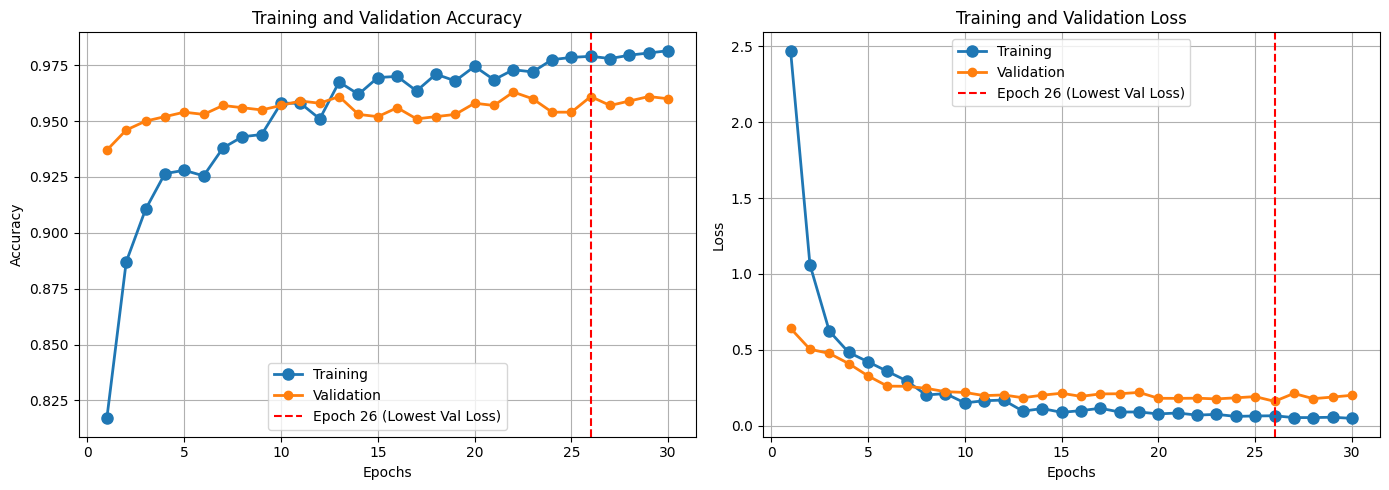

In [15]:
# Extract data from history
epochs = range(1, len(history.history["accuracy"]) + 1)

# Create subplots for accuracy and loss
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Highlight epoch 26 (lowest validation loss)
highlight_epoch = 26
highlight_color = "red"

# Plot accuracy and loss
for ax, metric, title, ylabel in zip(
        axes,
        [("accuracy", "val_accuracy"), ("loss", "val_loss")],
        ["Training and Validation Accuracy", "Training and Validation Loss"],
        ["Accuracy", "Loss"]
):
    ax.plot(epochs, history.history[metric[0]], "o-", label="Training", markersize=8, linewidth=2)
    ax.plot(epochs, history.history[metric[1]], "o-", label="Validation", linewidth=2)

    # Highlight the 26th epoch
    ax.axvline(highlight_epoch, linestyle="--", color=highlight_color,
               label=f"Epoch {highlight_epoch} (Lowest Val Loss)")
    ax.set_title(title)
    ax.set_xlabel("Epochs")
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

From the plots, we observe that the training accuracy steadily increases over the epochs, reaching nearly 98% by the end of training. The validation accuracy improves until around **epoch 26**, where it peaks at approximately 96%, and remains consistent without significant fluctuations afterward.

The training loss consistently decreases as expected, while the validation loss reaches its minimum at **epoch 26** and then remains stable. This suggests that the model achieves a strong balance between training and validation performance without significant overfitting, as the validation metrics show no substantial divergence from the training metrics.

The stable validation loss and accuracy highlight the model's ability to generalize well to unseen data. This performance could be further enhanced with additional techniques like fine-tuning the base model or further augmenting the dataset.

Now, let's evaluate the model on the test dataset to determine its performance on unseen data.

#### 7.2 Evaluating the Improved Model

For evaluating the model, we will load the best version of the model we saved during training using the ModelCheckpoint callback. We will then evaluate the model on the test dataset to determine its performance on unseen data.

In [16]:
# Load the best model
best_model = load_model("../Models/Dogs_vs_Cats_VGG16_Augmented.keras")

# Evaluate the model on the test dataset
test_loss, test_accuracy = best_model.evaluate(test_dataset, verbose=0)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%")

Test Loss: 0.1510, Test Accuracy: 97.20%


The model was evaluated on the test dataset and achieved the following results:
- **Test Loss:** 0.1510
- **Test Accuracy:** 97.20%

The low test loss reflects a minimal average error in the model's predictions as measured by the binary cross-entropy loss function. The high accuracy indicates that the model correctly classified 97.20% of the test samples, showcasing strong generalization to unseen data.

These results suggest that the model has effectively learned the patterns in the data and demonstrates excellent performance. Further improvements, such as fine-tuning the base model or exploring additional augmentation techniques, could further enhance performance.

Now, let's examine some of the images the model incorrectly classified to gain deeper insights into its predictions.

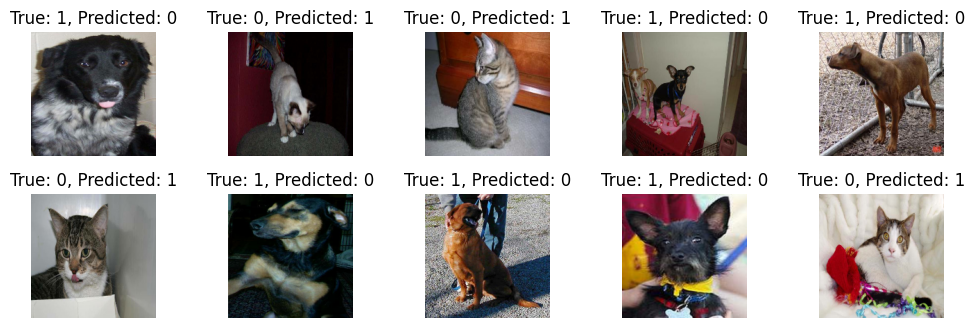

In [17]:
# Get the predictions from the model
predictions = model.predict(test_dataset, verbose=0)
predicted_labels = (predictions > 0.5).astype("int32")  # Convert probabilities to binary labels (0 or 1)

# Extract true labels and images from the dataset
true_labels = []
images = []

for image_batch, label_batch in test_dataset:
    images.extend(image_batch.numpy())  # Collect images
    true_labels.extend(label_batch.numpy())  # Collect true labels

true_labels = np.array(true_labels)

# Identify misclassified images
wrong_indices = np.where(predicted_labels.flatten() != true_labels)[0]

# Display some of the wrongly identified images
num_images = min(10, len(wrong_indices))  # Limit to 9 images for display
plt.figure(figsize=(10, 5))

for i, idx in enumerate(wrong_indices[:num_images]):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[idx].astype("uint8"))  # Convert image data to displayable format
    plt.title(f"True: {true_labels[idx]}, Predicted: {predicted_labels[idx][0]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

Possible Reasons for Incorrect Predictions

1. **Ambiguous Features:**
   - Some images may lack clear distinguishing features between cats and dogs:
     - The dog in the first row, first column (True: 1, Predicted: 0) might have been misclassified due to its fur pattern resembling a cat's.
     - The cat in the second row, fourth column (True: 0, Predicted: 1) may appear dog-like due to its body posture and the colorful objects in the background.

2. **Lighting and Background:**
   - Poor lighting or complex backgrounds might confuse the model:
     - The dog in the first row, fifth column (True: 1, Predicted: 0) is in a low-light environment, potentially obscuring its "dog-like" features.
     - The cat in the second row, last column (True: 0, Predicted: 1) may have been misclassified due to the bright and distracting background.

3. **Class Similarities:**
   - Cats and dogs can share similar features such as fur patterns or ear shapes:
     - The cat in the first row, third column (True: 0, Predicted: 1) might have been confused with a small dog due to its sitting posture.
     - The dog in the second row, fifth column (True: 1, Predicted: 0) has a small size and pointed ears, which might resemble a cat.

4. **Perspective and Cropping:**
   - Unusual angles or cropped images can obscure important features:
     - The dog in the second row, second column (True: 1, Predicted: 0) is cropped closely, which may prevent the model from recognizing its full structure.
     - The cat in the first row, second column (True: 0, Predicted: 1) appears in an angled view, making it harder to distinguish.

5. **Model Limitations and Bias:**
   - Despite strong performance, the model may still have biases based on the training dataset:
     - It might prioritize certain features (e.g., fur color or background elements) over more defining ones like facial structure or body shape.
     - For example, the dog in the second row, third column (True: 1, Predicted: 0) might have been misclassified due to a bias toward specific coat colors associated with cats.

6. **Distracting Elements:**
   - Objects or other animals in the image may divert the model's focus:
     - The dog in the first row, fourth column (True: 1, Predicted: 0) may have been misclassified due to the presence of multiple dogs, confusing the model.
     - The cat in the second row, last column (True: 0, Predicted: 1) is surrounded by colorful toys, which might distract the model from focusing on its features.

By analyzing these misclassifications, we can identify opportunities to further improve the model, such as enhancing training data diversity, refining augmentation techniques, or introducing additional layers for fine-grained feature extraction.

### 8. Summary, Conclusions, and Future Work

In this notebook, we developed and evaluated two different models for classifying images of dogs and cats. The first model achieved a test accuracy of **69.55%** and a test loss of **0.5902**. By leveraging transfer learning with the VGG16 architecture and applying data augmentation, the second, improved model significantly outperformed the first, achieving a remarkable test accuracy of **97.2%** and a test loss of **0.1510**.

#### Why Does Transfer Learning Help?

Transfer learning is effective because pretrained models, such as VGG16, have already learned to detect general visual features (e.g., edges, shapes, textures) from extensive datasets like ImageNet, which contains millions of images. By reusing these learned features, we can focus on fine-tuning the model for our specific task. This approach saves time, reduces the amount of data required for training, and improves accuracy by leveraging the pretrained model's prior knowledge.

#### How Does Data Augmentation Affect Results?

Data augmentation improves results by increasing the diversity of the training data. By applying transformations such as rotation, flipping, zooming, and shifting, it effectively creates new variations of the original images. This helps the model generalize better to unseen data and reduces overfitting, as it learns to recognize patterns under various conditions instead of relying on specific features seen in the training dataset.

#### Challenges Faced

1. **Overfitting in the First Model**: The first model struggled to generalize to unseen data due to the lack of regularization techniques such as dropout and data augmentation.
2. **High Computational Costs**: Fine-tuning pretrained models and performing data augmentation required significant computational resources.
3. **Misclassifications**: Even with the improved model, some images were incorrectly classified due to ambiguous features, challenging angles, or distracting backgrounds.

#### Future Work and Recommendations

To further improve model performance and robustness we could:
1. **Fine-Tuning the Pretrained Model**: Unlock some of the layers in the pretrained VGG16 model and retrain them on our dataset to adapt more specifically to the task.
2. **Larger Dataset**: Use a more extensive dataset with greater variety, including more breeds, lighting conditions, and backgrounds.
3. **Hyperparameter Optimization**: Experiment with different learning rates, dropout rates, and layer configurations to optimize model performance.
4. **Ensemble Learning**: Combine multiple models to create an ensemble, which can average out individual model errors and improve overall accuracy.
5. **Explainable AI Techniques**: Use tools like Grad-CAM to better understand why the model misclassifies certain images, which could provide insights into further improvements.

By addressing these points, future iterations of the model could achieve even greater performance and generalization capabilities.

TODO: Rewrite this if you want xD